### This is a deep learning model for to study dependencies of various weather parameters on each other. The parameters are ['Minimum_Temperature', 'Maximum_Temperature', 'Temperature','Dew_Point', 'Relative_Humidity', 'Heat_Index', 'Wind_Speed', 'Wind_Direction', 'Precipitation', 'Precipitation_Cover', 'Visibility', 'Sea_Level_Pressure']. 

Model used : Sequential(\
                      (0): Linear(in_features=11, out_features=128, bias=True)\
                      (1): LeakyReLU(negative_slope=0.1)\
                      (2): Linear(in_features=128, out_features=128, bias=True)\
                      (3): LeakyReLU(negative_slope=0.1)\
                      (4): Linear(in_features=128, out_features=1, bias=True)\
                      )

In [134]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from math import sqrt

import matplotlib.pyplot as plt

In [2]:
# dataset is of weekly weather parameters starting jan 2000 to Dec 2019
data = 'data_kochi.csv'
df = pd.read_csv(data).set_index('Period')

In [3]:
# setting up df to display all the columns
pd.set_option('display.max_columns', None)

In [4]:
df

,Address,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,Wind Direction,Wind Chill,Precipitation,Precipitation Cover,Snow Depth,Visibility,Cloud Cover,Sea Level Pressure,Latitude,Longitude,Resolved Address,Name
Period,,,,,,,,,,,,,,,,,,,,,
Week 2 (Jan) 2000,683111,75.5,89.7,82.4,72.2,72.36,96.0,11.4,NaN,233.00,NaN,0.5,2.96,NaN,2.5,NaN,1009.0,10.15006,76.39934,683111,NaN
Week 3 (Jan) 2000,683111,75.3,90.2,82.5,74.3,77.37,99.4,11.4,NaN,223.64,NaN,0.8,2.96,NaN,2.5,NaN,1009.7,10.15006,76.39934,683111,NaN
Week 4 (Jan) 2000,683111,72.2,90.8,82.2,71.7,72.10,93.6,11.4,NaN,281.25,NaN,0.0,0.00,NaN,2.5,NaN,1012.1,10.15006,76.39934,683111,NaN
Week 5 (Jan) 2000,683111,71.7,89.7,81.7,70.0,70.08,94.4,11.4,NaN,204.80,NaN,0.0,0.00,NaN,2.6,NaN,1012.4,10.15006,76.39934,683111,NaN
Week 6 (Jan) 2000,683111,73.7,89.9,81.1,72.4,76.68,98.6,13.9,NaN,237.20,NaN,2.6,1.18,NaN,2.4,NaN,1011.5,10.15006,76.39934,683111,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Week 46 (Nov) 2019,683111,75.1,94.9,82.9,75.7,80.44,107.5,11.4,NaN,116.18,NaN,1.3,3.55,NaN,2.6,36.1,1010.4,10.15006,76.39934,683111,NaN
Week 47 (Nov) 2019,683111,75.1,94.9,83.7,74.9,76.57,107.5,11.4,NaN,94.51,NaN,0.7,0.59,NaN,2.8,36.7,1010.5,10.15006,76.39934,683111,NaN
Week 48 (Nov) 2019,683111,73.3,94.9,83.2,74.3,76.27,102.6,11.4,NaN,61.17,NaN,0.6,1.18,NaN,2.7,33.3,1009.3,10.15006,76.39934,683111,NaN


In [5]:
#Dropping classification columns and those which had NAN
df.drop(df.columns[[0,8,10,13,15,17,18,19,20]], axis=1, inplace=True)

In [131]:
df

,Minimum_Temperature,Maximum_Temperature,Temperature,Dew_Point,Relative_Humidity,Heat_Index,Wind_Speed,Wind_Direction,Precipitation,Precipitation_Cover,Visibility,Sea_Level_Pressure
Period,,,,,,,,,,,,
Week 2 (Jan) 2000,75.5,89.7,82.4,72.2,72.36,96.0,11.4,233.00,0.5,2.96,2.5,1009.0
Week 3 (Jan) 2000,75.3,90.2,82.5,74.3,77.37,99.4,11.4,223.64,0.8,2.96,2.5,1009.7
Week 4 (Jan) 2000,72.2,90.8,82.2,71.7,72.10,93.6,11.4,281.25,0.0,0.00,2.5,1012.1
Week 5 (Jan) 2000,71.7,89.7,81.7,70.0,70.08,94.4,11.4,204.80,0.0,0.00,2.6,1012.4
Week 6 (Jan) 2000,73.7,89.9,81.1,72.4,76.68,98.6,13.9,237.20,2.6,1.18,2.4,1011.5
...,...,...,...,...,...,...,...,...,...,...,...,...
Week 46 (Nov) 2019,75.1,94.9,82.9,75.7,80.44,107.5,11.4,116.18,1.3,3.55,2.6,1010.4
Week 47 (Nov) 2019,75.1,94.9,83.7,74.9,76.57,107.5,11.4,94.51,0.7,0.59,2.8,1010.5
Week 48 (Nov) 2019,73.3,94.9,83.2,74.3,76.27,102.6,11.4,61.17,0.6,1.18,2.7,1009.3


### visualizing clustered paramters individually

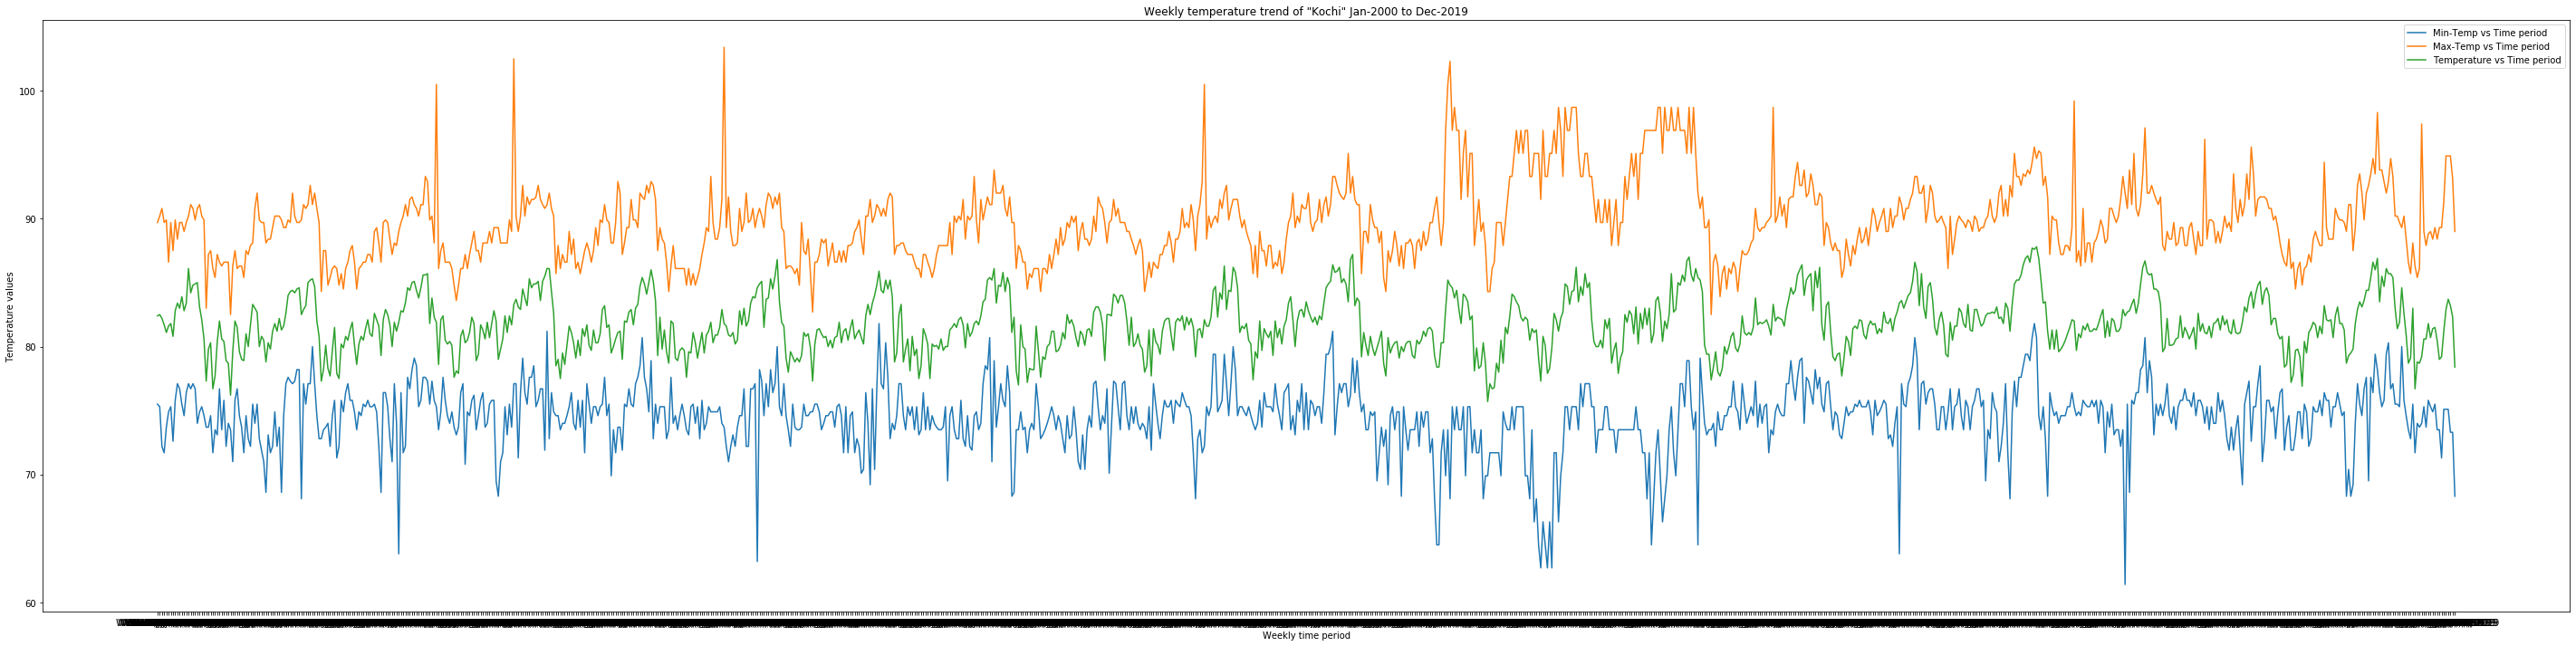

In [144]:
#visualizing the temperature data
plt.figure(figsize=(50,12))
plt.plot(df.index.values, df['Minimum_Temperature'], label='Min-Temp vs Time period') 
plt.plot(df.index.values, df['Maximum_Temperature'], label='Max-Temp vs Time period')
plt.plot(df.index.values, df['Temperature'], label='Temperature vs Time period')
plt.title('Weekly temperature trend of "Kochi" Jan-2000 to Dec-2019')
plt.legend(loc='best')
plt.xlabel('Weekly time period')
plt.ylabel('Temperature values')
plt.show()

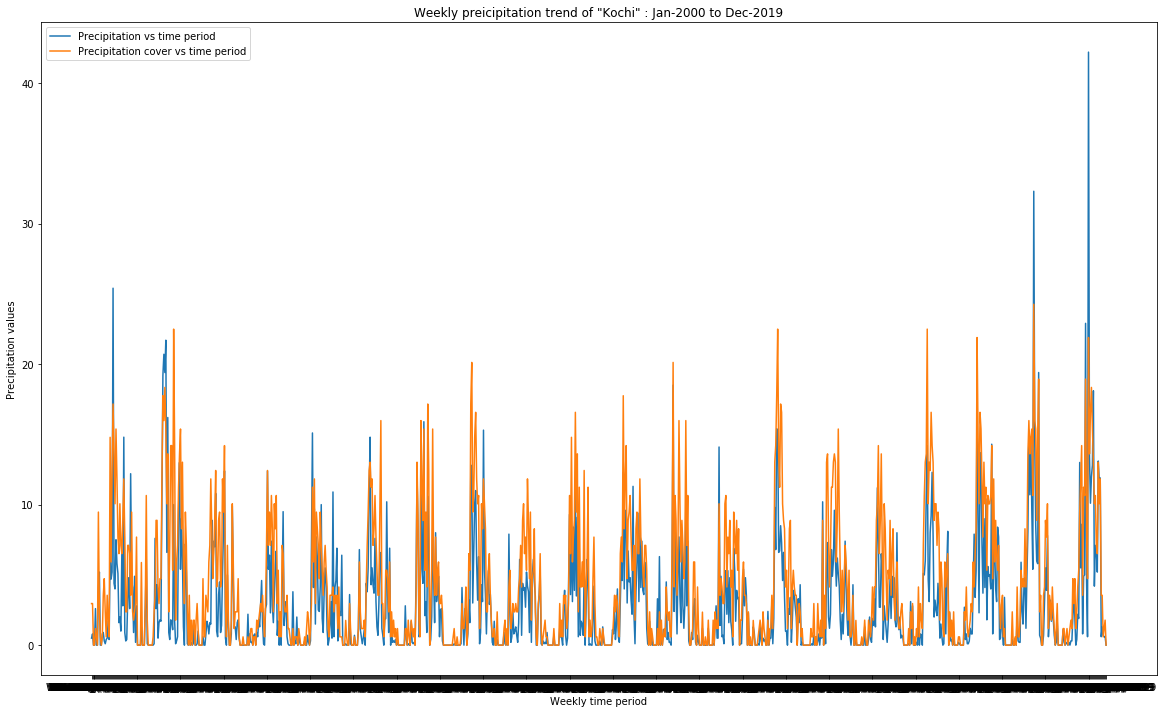

In [150]:
#Visualizing precipitation data
plt.figure(figsize=(20,12))
plt.plot(df.index.values, df['Precipitation'], label='Precipitation vs time period')
plt.plot(df.index.values, df['Precipitation_Cover'], label='Precipitation cover vs time period')
plt.title('Weekly preicipitation trend of "Kochi" : Jan-2000 to Dec-2019')
plt.legend(loc='best')
plt.xlabel('Weekly time period')
plt.ylabel('Precipitation values')
plt.show()

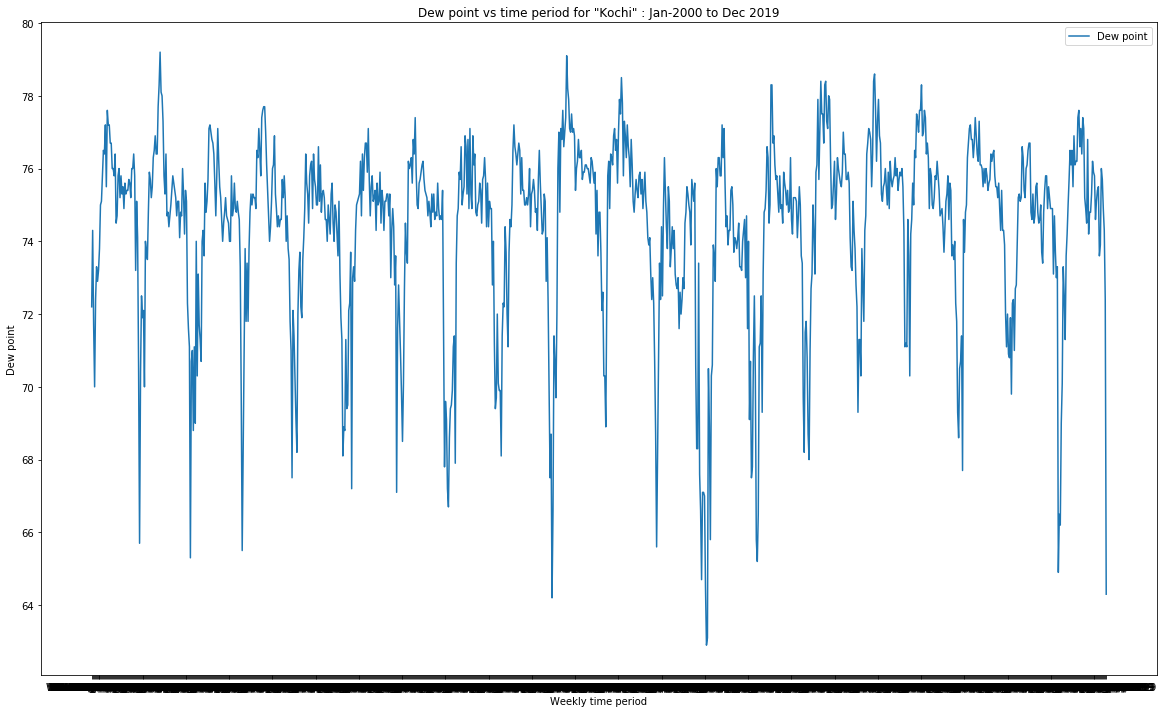

In [148]:
# Visualizing dew-point trend
plt.figure(figsize=(20,12))
plt.plot(df.index.values, df['Dew_Point'], label='Dew point')
plt.legend(loc='best')
plt.title('Dew point vs time period for "Kochi" : Jan-2000 to Dec 2019')
plt.xlabel('Weekly time period')
plt.ylabel('Dew point')
plt.show()

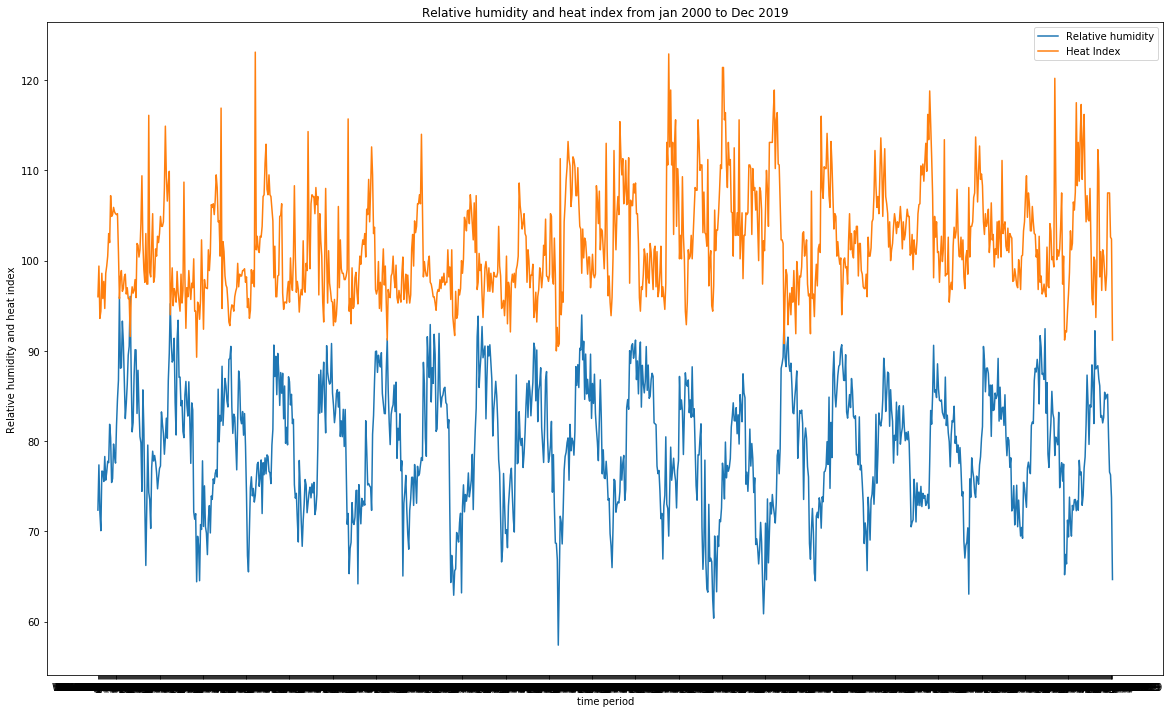

In [149]:
#Visualizing relative humidity trend
plt.figure(figsize=(20,12))
plt.plot(df.index.values, df['Relative_Humidity'], label='Relative humidity')
plt.plot(df.index.values, df['Heat_Index'], label='Heat Index')
plt.legend(loc='best')
plt.title('Relative humidity and heat index from jan 2000 to Dec 2019')
plt.xlabel('time period')
plt.ylabel('Relative humidity and heat index')
plt.show()

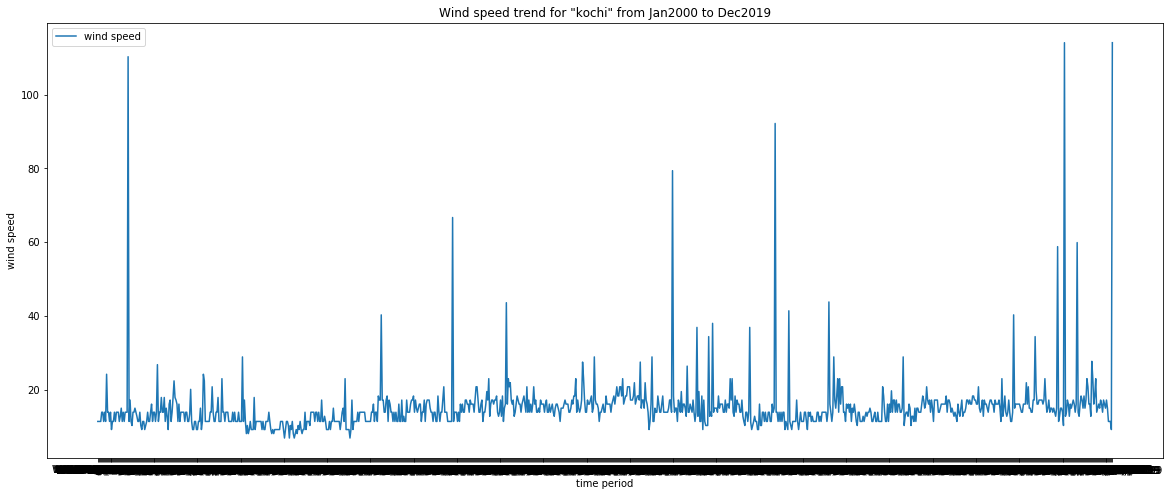

In [154]:
#Visualizing wind speed trend
plt.figure(figsize=(20,8))
plt.plot(df.index.values, df['Wind_Speed'], label='wind speed')
plt.legend(loc='best')
plt.title('Wind speed trend for "kochi" from Jan2000 to Dec2019')
plt.xlabel('time period')
plt.ylabel('wind speed')
plt.show()

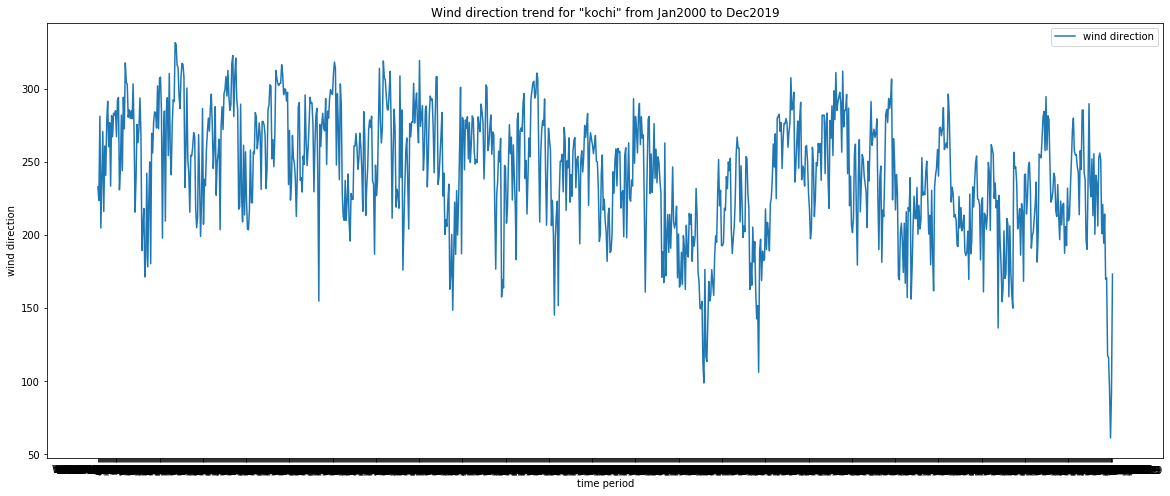

In [155]:
#Visualizing wind direction trend
plt.figure(figsize=(20,8))
plt.plot(df.index.values, df['Wind_Direction'], label='wind direction')
plt.legend(loc='best')
plt.title('Wind direction trend for "kochi" from Jan2000 to Dec2019')
plt.xlabel('time period')
plt.ylabel('wind direction')
plt.show()

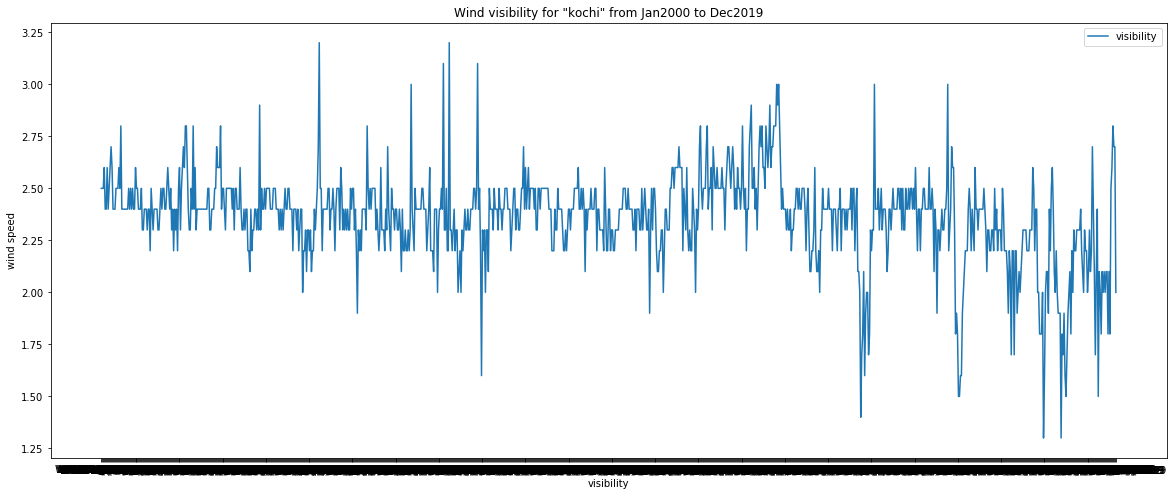

In [156]:
#Visualizing visibility trend
plt.figure(figsize=(20,8))
plt.plot(df.index.values, df['Visibility'], label='visibility')
plt.legend(loc='best')
plt.title('Wind visibility for "kochi" from Jan2000 to Dec2019')
plt.xlabel('visibility')
plt.ylabel('wind speed')
plt.show()

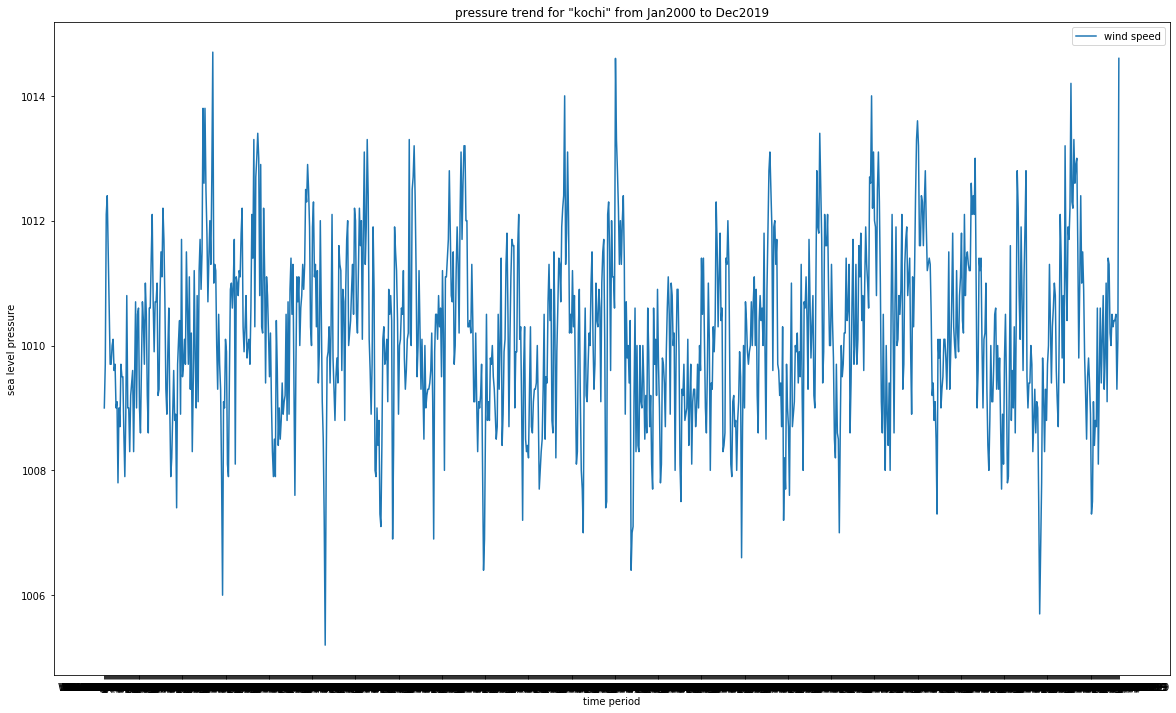

In [157]:
#Visualizing sea level pressure trend
plt.figure(figsize=(20,12))
plt.plot(df.index.values, df['Sea_Level_Pressure'], label='wind speed')
plt.legend(loc='best')
plt.title('pressure trend for "kochi" from Jan2000 to Dec2019')
plt.xlabel('time period')
plt.ylabel('sea level pressure')
plt.show()

### Visualizing all parameters in one window

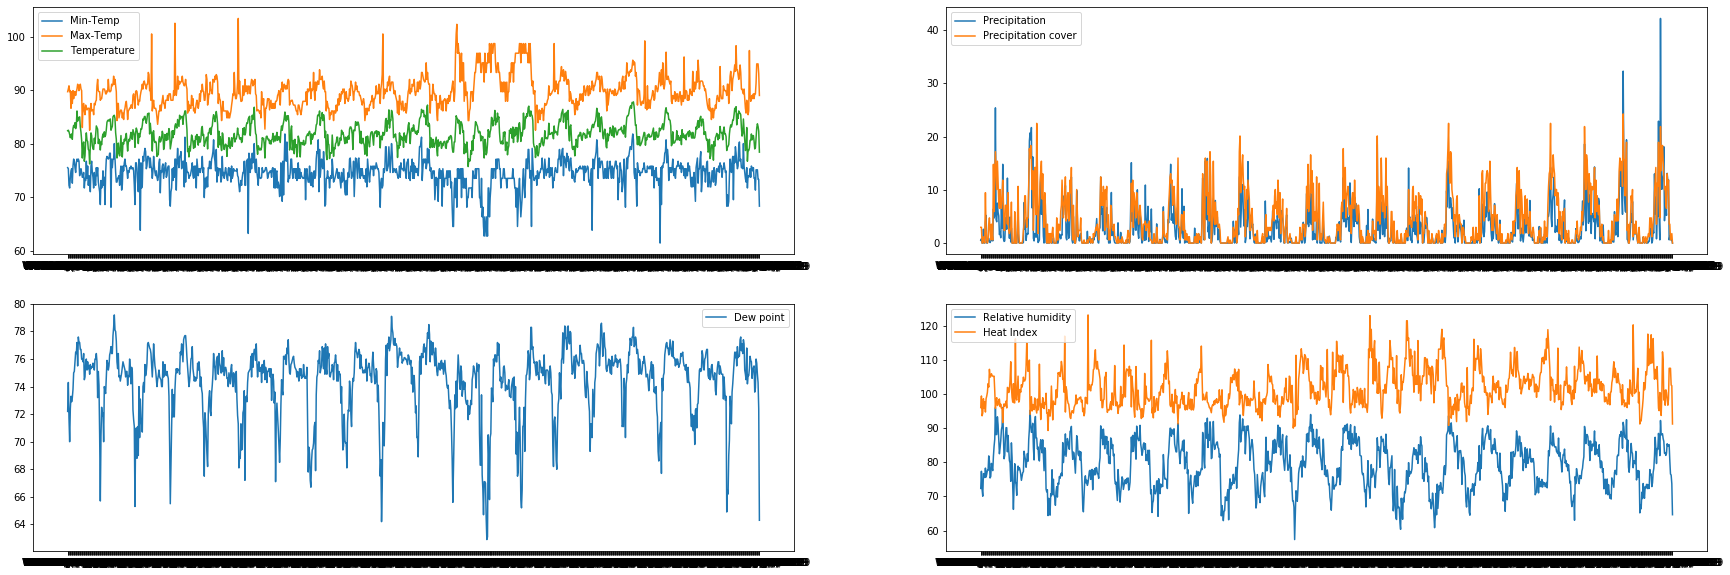

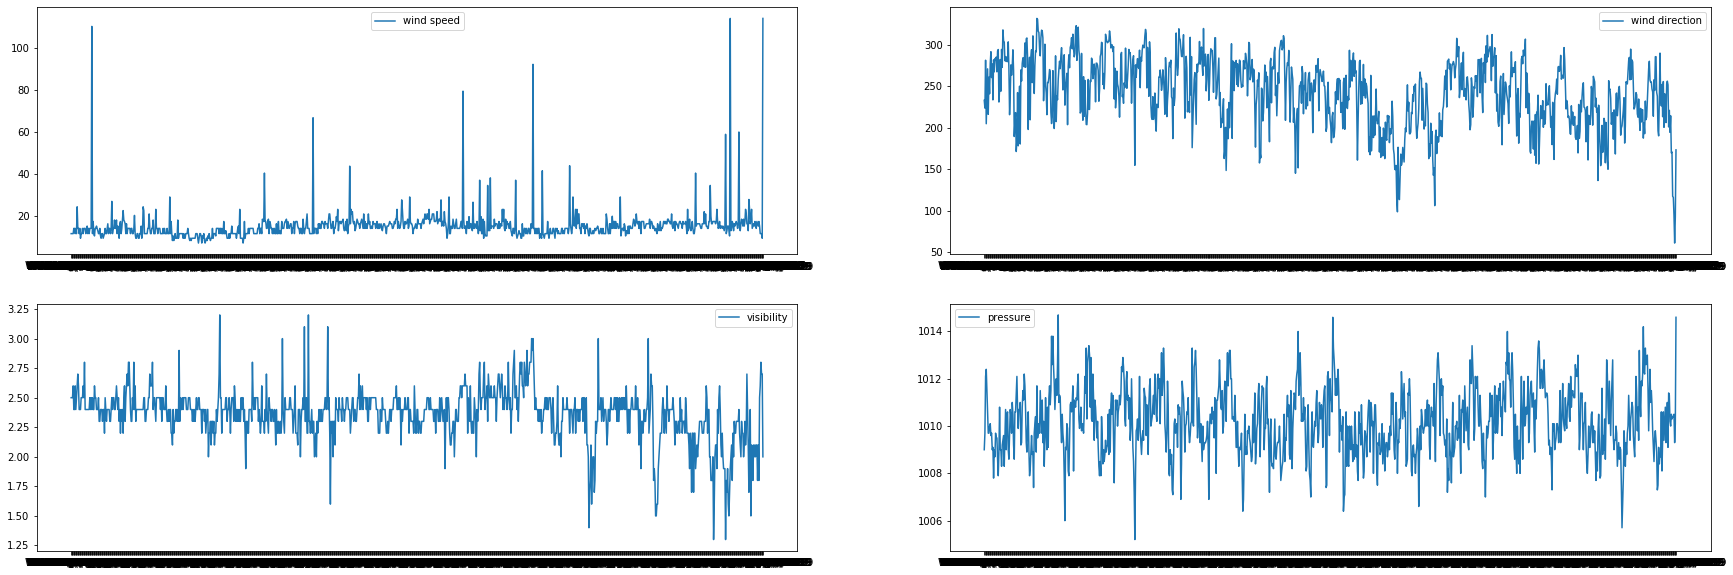

In [173]:
f1 = plt.figure(figsize=(30,10))
f2 = plt.figure(figsize=(30,10))
#subplot (4 rows, 2 columns, first plot)
ax1 = f1.add_subplot(2, 2, 1)
ax1.plot(df.index.values, df['Minimum_Temperature'], label='Min-Temp') 
ax1.plot(df.index.values, df['Maximum_Temperature'], label='Max-Temp')
ax1.plot(df.index.values, df['Temperature'], label='Temperature')
ax1.legend(loc='best')


#subplot (4 rows, 2 columns, second plot)
ax2 = f1.add_subplot(2, 2, 2)
ax2.plot(df.index.values, df['Precipitation'], label='Precipitation')
ax2.plot(df.index.values, df['Precipitation_Cover'], label='Precipitation cover')
ax2.legend(loc='best')


#subplot (4 row, 2 column, third plot)
ax3 = f1.add_subplot(2, 2, 3)
ax3.plot(df.index.values, df['Dew_Point'], label='Dew point')
ax3.legend(loc='best')


#subplot (4 row, 2 column, fourth plot)
ax4 = f1.add_subplot(2, 2, 4)
ax4.plot(df.index.values, df['Relative_Humidity'], label='Relative humidity')
ax4.plot(df.index.values, df['Heat_Index'], label='Heat Index')
ax4.legend(loc='best')


#subplot (4 row, 2 column, fifth plot)
ax5 = f2.add_subplot(2, 2, 1)
ax5.plot(df.index.values, df['Wind_Speed'], label='wind speed')
ax5.legend(loc='best')


#subplot (4 row, 2 column, sixth plot)
ax6 = f2.add_subplot(2, 2, 2)
ax6.plot(df.index.values, df['Wind_Direction'], label='wind direction')
ax6.legend(loc='best')


#subplot (4 row, 2 column, seventh plot)
ax7 = f2.add_subplot(2, 2 ,3)
ax7.plot(df.index.values, df['Visibility'], label='visibility')
ax7.legend(loc='best')


#subplot (4 row, 2 column, eighth plot)
ax8 = f2.add_subplot(2, 2, 4)
ax8.plot(df.index.values, df['Sea_Level_Pressure'], label='pressure')
ax8.legend(loc='best')


plt.show()

In [7]:
# creating input and output with "Precipitation" as predicting variable
x_ppt = df.loc[:, df.columns != 'Precipitation']
y_ppt = df['Precipitation']

In [8]:
y_ppt

Period
Week 2 (Jan) 2000     0.5
Week 3 (Jan) 2000     0.8
Week 4 (Jan) 2000     0.0
Week 5 (Jan) 2000     0.0
Week 6 (Jan) 2000     2.6
                     ... 
Week 46 (Nov) 2019    1.3
Week 47 (Nov) 2019    0.7
Week 48 (Nov) 2019    0.6
Week 49 (Dec) 2019    0.6
Week 1 (Dec) 2019     0.0
Name: Precipitation, Length: 1039, dtype: float64

In [9]:
x_ppt

,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Direction,Precipitation Cover,Visibility,Sea Level Pressure
Period,,,,,,,,,,,
Week 2 (Jan) 2000,75.5,89.7,82.4,72.2,72.36,96.0,11.4,233.00,2.96,2.5,1009.0
Week 3 (Jan) 2000,75.3,90.2,82.5,74.3,77.37,99.4,11.4,223.64,2.96,2.5,1009.7
Week 4 (Jan) 2000,72.2,90.8,82.2,71.7,72.10,93.6,11.4,281.25,0.00,2.5,1012.1
Week 5 (Jan) 2000,71.7,89.7,81.7,70.0,70.08,94.4,11.4,204.80,0.00,2.6,1012.4
Week 6 (Jan) 2000,73.7,89.9,81.1,72.4,76.68,98.6,13.9,237.20,1.18,2.4,1011.5
...,...,...,...,...,...,...,...,...,...,...,...
Week 46 (Nov) 2019,75.1,94.9,82.9,75.7,80.44,107.5,11.4,116.18,3.55,2.6,1010.4
Week 47 (Nov) 2019,75.1,94.9,83.7,74.9,76.57,107.5,11.4,94.51,0.59,2.8,1010.5
Week 48 (Nov) 2019,73.3,94.9,83.2,74.3,76.27,102.6,11.4,61.17,1.18,2.7,1009.3


In [10]:
# creating x and y with "Precipitation Cover" being predicting variable
x_ppt_cover = df.loc[:, df.columns != 'Precipitation Cover']
y_ppt_cover = df['Precipitation Cover']

In [11]:
# Converting dataframe into tensor values
x_ppt = torch.tensor(x_ppt.values)
y_ppt = torch.tensor(y_ppt.values)

In [12]:
y_ppt

tensor([0.5000, 0.8000, 0.0000,  ..., 0.6000, 0.6000, 0.0000],
       dtype=torch.float64)

In [13]:
# converting dataframe into tensor values
x_ppt_cover = torch.tensor(x_ppt_cover.values)
y_ppt_cover = torch.tensor(y_ppt_cover.values)

In [14]:
y_ppt_cover

tensor([2.9600, 2.9600, 0.0000,  ..., 1.1800, 1.7800, 0.0000],
       dtype=torch.float64)

In [15]:
print(y_ppt_cover.shape, y_ppt.shape)

torch.Size([1039]) torch.Size([1039])


In [16]:
# Converting y_ppt and y_ppt_cover from 1D tensor to 2D tensor
y_ppt = y_ppt.reshape(-1, 1)
y_ppt_cover = y_ppt_cover.reshape(-1, 1)

In [17]:
print(y_ppt_cover.shape, y_ppt.shape)

torch.Size([1039, 1]) torch.Size([1039, 1])


In [18]:
#Scaling the data into -1 to +1 range
scaler = preprocessing.MinMaxScaler()
x_ppt = scaler.fit_transform(x_ppt)
y_ppt = scaler.fit_transform(y_ppt)
x_ppt_cover = scaler.fit_transform(x_ppt_cover)
y_ppt_cover = scaler.fit_transform(y_ppt_cover)

In [19]:
# Splitting dataset into test train split
test_fraction = 0.1
x_ppt_train, x_ppt_test, y_ppt_train, y_ppt_test = train_test_split(x_ppt, y_ppt, test_size=test_fraction)
x_ppt_cover_train, x_ppt_cover_test, y_ppt_cover_train, y_ppt_cover_test = train_test_split(x_ppt_cover, y_ppt_cover, test_size = test_fraction)

In [20]:
valid_fraction = 0.1
# creating validation dataset from training dataset
x_ppt_train, x_ppt_valid, y_ppt_train, y_ppt_valid = train_test_split(x_ppt_train, y_ppt_train, test_size=valid_fraction)
x_ppt_cover_train, x_ppt_cover_valid, y_ppt_cover_train, y_ppt_cover_valid = train_test_split(x_ppt_cover_train, y_ppt_cover_train, test_size=valid_fraction)

In [21]:
type(x_ppt_train)

numpy.ndarray

output type of train_test_split is numpy array. Hence it needs to be converted back into tensor

In [22]:
# converting numpy array to tensor
x_ppt_train, x_ppt_test = torch.from_numpy(x_ppt_train), torch.from_numpy(x_ppt_test)
y_ppt_train, y_ppt_test = torch.from_numpy(y_ppt_train), torch.from_numpy(y_ppt_test)
x_ppt_valid, y_ppt_valid = torch.from_numpy(x_ppt_valid), torch.from_numpy(y_ppt_valid)

x_ppt_cover_train, x_ppt_cover_test = torch.from_numpy(x_ppt_cover_train), torch.from_numpy(x_ppt_cover_test)
y_ppt_cover_train, y_ppt_cover_test = torch.from_numpy(y_ppt_cover_train), torch.from_numpy(y_ppt_cover_test)
x_ppt_cover_valid, y_ppt_cover_valid = torch.from_numpy(x_ppt_cover_valid), torch.from_numpy(y_ppt_cover_valid)

In [23]:
type(x_ppt_cover_valid)

torch.Tensor

In [24]:
print(x_ppt_train.shape, y_ppt_test.shape, x_ppt_cover_train.shape, y_ppt_cover_test.shape, x_ppt_valid.shape, y_ppt_cover_valid.shape)

torch.Size([841, 11]) torch.Size([104, 1]) torch.Size([841, 11]) torch.Size([104, 1]) torch.Size([94, 11]) torch.Size([94, 1])


In [25]:
# Defining nn model
n_in, n_h1, n_h2, n_out = 11, 128, 128, 1
model = nn.Sequential(nn.Linear(n_in,n_h1),
                     nn.LeakyReLU(0.1),
                     nn.Linear(n_h1,n_h2),
                     nn.LeakyReLU(0.1),
                     nn.Linear(n_h2,n_out))

In [26]:
# defining criterion
criterion = nn.MSELoss()
# defining optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

In [91]:
use_cuda = torch.cuda.is_available()
# training model for "Precipitation"
model.train()
valid_loss_min = np.Inf
n_epoch = 300
for epoch in range(1, n_epoch+1):
    train_loss = 0.0
    valid_loss = 0.0
    if use_cuda:
        x_ppt_train, y_ppt_train = x_ppt_train.cuda(), y_ppt_train.cuda()
    # forward pass
    y_pred_ppt = model(x_ppt_train.float())
    
    #loss
    loss_ppt = criterion(y_pred_ppt, y_ppt_train.float())
    # initializing gradients to zero
    optimizer.zero_grad()
    # performing backpropagation
    loss_ppt.backward()
    # updating weights
    optimizer.step()
    
    train_loss += loss_ppt.data - train_loss
    
    # Evaluating the model
    model.eval()
    if use_cuda:
        x_ppt_valid, y_ppt_valid = x_ppt_valid.cuda(), y_ppt_valid.cuda()
    
    y_valid = model(x_ppt_valid.float())
    loss_valid = criterion(y_valid, y_ppt_valid.float())
    
    valid_loss += loss_valid.data - valid_loss
    
    # printing loss every five epoch
    if epoch % 5 == 0:
        print("Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}".format(epoch, train_loss, valid_loss))
    
    #saving model if there is a decrement in validation loss
    if valid_loss<valid_loss_min:
        print('saving model: validation loss decreased from {:.6f} to {:.6f}'.format(valid_loss_min, valid_loss))
        torch.save(model.state_dict(), 'model_ppt.pt')
        valid_loss_min = valid_loss

saving model: validation loss decreased from inf to 0.118369
saving model: validation loss decreased from 0.118369 to 0.118179
saving model: validation loss decreased from 0.118179 to 0.117990
saving model: validation loss decreased from 0.117990 to 0.117802
Epoch: 5 	Training Loss: 0.110020 	Validation Loss: 0.117613
saving model: validation loss decreased from 0.117802 to 0.117613
saving model: validation loss decreased from 0.117613 to 0.117425
saving model: validation loss decreased from 0.117425 to 0.117237
saving model: validation loss decreased from 0.117237 to 0.117050
saving model: validation loss decreased from 0.117050 to 0.116863
Epoch: 10 	Training Loss: 0.109130 	Validation Loss: 0.116676
saving model: validation loss decreased from 0.116863 to 0.116676
saving model: validation loss decreased from 0.116676 to 0.116490
saving model: validation loss decreased from 0.116490 to 0.116304
saving model: validation loss decreased from 0.116304 to 0.116118
saving model: validation

Epoch: 130 	Training Loss: 0.090104 	Validation Loss: 0.096575
saving model: validation loss decreased from 0.096725 to 0.096575
saving model: validation loss decreased from 0.096575 to 0.096425
saving model: validation loss decreased from 0.096425 to 0.096276
saving model: validation loss decreased from 0.096276 to 0.096126
saving model: validation loss decreased from 0.096126 to 0.095977
Epoch: 135 	Training Loss: 0.089399 	Validation Loss: 0.095829
saving model: validation loss decreased from 0.095977 to 0.095829
saving model: validation loss decreased from 0.095829 to 0.095680
saving model: validation loss decreased from 0.095680 to 0.095532
saving model: validation loss decreased from 0.095532 to 0.095384
saving model: validation loss decreased from 0.095384 to 0.095237
Epoch: 140 	Training Loss: 0.088701 	Validation Loss: 0.095089
saving model: validation loss decreased from 0.095237 to 0.095089
saving model: validation loss decreased from 0.095089 to 0.094942
saving model: valid

saving model: validation loss decreased from 0.079644 to 0.079524
saving model: validation loss decreased from 0.079524 to 0.079404
saving model: validation loss decreased from 0.079404 to 0.079285
Epoch: 260 	Training Loss: 0.073716 	Validation Loss: 0.079166
saving model: validation loss decreased from 0.079285 to 0.079166
saving model: validation loss decreased from 0.079166 to 0.079046
saving model: validation loss decreased from 0.079046 to 0.078928
saving model: validation loss decreased from 0.078928 to 0.078809
saving model: validation loss decreased from 0.078809 to 0.078690
Epoch: 265 	Training Loss: 0.073159 	Validation Loss: 0.078572
saving model: validation loss decreased from 0.078690 to 0.078572
saving model: validation loss decreased from 0.078572 to 0.078454
saving model: validation loss decreased from 0.078454 to 0.078336
saving model: validation loss decreased from 0.078336 to 0.078219
saving model: validation loss decreased from 0.078219 to 0.078101
Epoch: 270 	Trai

In [92]:
# Testing the model
model.eval()
y_hat_ppt = model(x_ppt_test.float())
y_hat_ppt = y_hat_ppt.detach().numpy()
rmse_ppt = sqrt(mean_squared_error(y_ppt_test, y_hat_ppt))

In [93]:
print(rmse_ppt)

0.2603112348974134


In [30]:
# removing SPACE character from column names
df.columns = df.columns.str.replace(' ', '_')

In [39]:
RMSE = {}
training_loss = {}
validation_loss = {}
Y_hat = {}
for column in df.columns:
    x = df.loc[:, df.columns != column]
    y = df[column]
    # Converting dataframe into tensor values
    x = torch.tensor(x.values)
    y = torch.tensor(y.values)
    #Scaling the data into -1 to +1 range
    scaler = preprocessing.MinMaxScaler()
    x = scaler.fit_transform(x)
    y = y.reshape(-1, 1)
    y = scaler.fit_transform(y)
    # Splitting dataset into test train split
    test_fraction = 0.1
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_fraction)
    # creating validation dataset from training dataset
    valid_fraction = 0.1
    x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=valid_fraction)
    # converting numpy array to tensor
    x_train, x_test = torch.from_numpy(x_train), torch.from_numpy(x_test)
    y_train, y_test = torch.from_numpy(y_train), torch.from_numpy(y_test)
    x_valid, y_valid = torch.from_numpy(x_valid), torch.from_numpy(y_valid)
    
    use_cuda = torch.cuda.is_available()
    # training model for "Precipitation"
    model.train()
    valid_loss_min = np.Inf
    n_epoch = 300
    for epoch in range(1, n_epoch+1):
        train_loss = 0.0
        valid_loss = 0.0
        if use_cuda:
            x_train, y_train = x_train.cuda(), y_train.cuda()
        # forward pass
        y_pred = model(x_train.float())
        
        # initializing gradients to zero
        optimizer.zero_grad()
        #loss
        loss_train = criterion(y_pred, y_train.float())
        # performing backpropagation
        loss_train.backward()
        # updating weights
        optimizer.step()
    
        train_loss += loss_train.data - train_loss
    
        # Evaluating the model
        model.eval()
        if use_cuda:
            x_valid, y_valid = x_valid.cuda(), y_valid.cuda()
    
        y_pred_valid = model(x_valid.float())
        loss_valid = criterion(y_pred_valid, y_valid.float())
    
        valid_loss += loss_valid.data - valid_loss
    
        # printing loss every five epoch
        if epoch % 20 == 0:
            print("Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}".format(epoch, train_loss, valid_loss))
    
        #saving model if there is a decrement in validation loss
        if valid_loss<valid_loss_min:
            print('saving model: validation loss decreased from {:.6f} to {:.6f}'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), 'savedModels/model_%s.pt' %(column))
            valid_loss_min = valid_loss
    #saving final training and validation loss for each parameter
    training_loss[column] = train_loss
    validation_loss[column] = valid_loss
    # Testing the model
    model.eval()
    y_hat = model(x_test.float())
    y_hat = y_hat.detach().numpy()
    rmse = sqrt(mean_squared_error(y_test, y_hat))
    y_hat = scaler.inverse_transform(y_hat)
    Y_hat[column] = y_hat
    RMSE[column] = rmse

saving model: validation loss decreased from inf to 0.398033
saving model: validation loss decreased from 0.398033 to 0.397504
saving model: validation loss decreased from 0.397504 to 0.396976
saving model: validation loss decreased from 0.396976 to 0.396448
saving model: validation loss decreased from 0.396448 to 0.395922
saving model: validation loss decreased from 0.395922 to 0.395396
saving model: validation loss decreased from 0.395396 to 0.394871
saving model: validation loss decreased from 0.394871 to 0.394346
saving model: validation loss decreased from 0.394346 to 0.393822
saving model: validation loss decreased from 0.393822 to 0.393299
saving model: validation loss decreased from 0.393299 to 0.392777
saving model: validation loss decreased from 0.392777 to 0.392255
saving model: validation loss decreased from 0.392255 to 0.391734
saving model: validation loss decreased from 0.391734 to 0.391214
saving model: validation loss decreased from 0.391214 to 0.390694
saving model: v

saving model: validation loss decreased from 0.334171 to 0.333730
saving model: validation loss decreased from 0.333730 to 0.333290
saving model: validation loss decreased from 0.333290 to 0.332850
saving model: validation loss decreased from 0.332850 to 0.332411
saving model: validation loss decreased from 0.332411 to 0.331972
saving model: validation loss decreased from 0.331972 to 0.331534
Epoch: 140 	Training Loss: 0.316596 	Validation Loss: 0.331096
saving model: validation loss decreased from 0.331534 to 0.331096
saving model: validation loss decreased from 0.331096 to 0.330659
saving model: validation loss decreased from 0.330659 to 0.330223
saving model: validation loss decreased from 0.330223 to 0.329787
saving model: validation loss decreased from 0.329787 to 0.329352
saving model: validation loss decreased from 0.329352 to 0.328917
saving model: validation loss decreased from 0.328917 to 0.328484
saving model: validation loss decreased from 0.328484 to 0.328050
saving model:

saving model: validation loss decreased from 0.281550 to 0.281180
saving model: validation loss decreased from 0.281180 to 0.280810
saving model: validation loss decreased from 0.280810 to 0.280441
saving model: validation loss decreased from 0.280441 to 0.280072
saving model: validation loss decreased from 0.280072 to 0.279704
saving model: validation loss decreased from 0.279704 to 0.279336
saving model: validation loss decreased from 0.279336 to 0.278969
saving model: validation loss decreased from 0.278969 to 0.278602
saving model: validation loss decreased from 0.278602 to 0.278236
saving model: validation loss decreased from 0.278236 to 0.277870
saving model: validation loss decreased from 0.277870 to 0.277505
saving model: validation loss decreased from 0.277505 to 0.277140
saving model: validation loss decreased from 0.277140 to 0.276776
saving model: validation loss decreased from 0.276776 to 0.276412
saving model: validation loss decreased from 0.276412 to 0.276048
saving mod

saving model: validation loss decreased from 0.049258 to 0.049214
saving model: validation loss decreased from 0.049214 to 0.049169
saving model: validation loss decreased from 0.049169 to 0.049125
Epoch: 100 	Training Loss: 0.054166 	Validation Loss: 0.049081
saving model: validation loss decreased from 0.049125 to 0.049081
saving model: validation loss decreased from 0.049081 to 0.049038
saving model: validation loss decreased from 0.049038 to 0.048994
saving model: validation loss decreased from 0.048994 to 0.048950
saving model: validation loss decreased from 0.048950 to 0.048906
saving model: validation loss decreased from 0.048906 to 0.048863
saving model: validation loss decreased from 0.048863 to 0.048819
saving model: validation loss decreased from 0.048819 to 0.048776
saving model: validation loss decreased from 0.048776 to 0.048732
saving model: validation loss decreased from 0.048732 to 0.048689
saving model: validation loss decreased from 0.048689 to 0.048646
saving model:

saving model: validation loss decreased from 0.044013 to 0.043977
saving model: validation loss decreased from 0.043977 to 0.043942
saving model: validation loss decreased from 0.043942 to 0.043907
saving model: validation loss decreased from 0.043907 to 0.043871
saving model: validation loss decreased from 0.043871 to 0.043836
saving model: validation loss decreased from 0.043836 to 0.043801
saving model: validation loss decreased from 0.043801 to 0.043766
saving model: validation loss decreased from 0.043766 to 0.043731
saving model: validation loss decreased from 0.043731 to 0.043695
saving model: validation loss decreased from 0.043695 to 0.043660
saving model: validation loss decreased from 0.043660 to 0.043626
Epoch: 240 	Training Loss: 0.047699 	Validation Loss: 0.043591
saving model: validation loss decreased from 0.043626 to 0.043591
saving model: validation loss decreased from 0.043591 to 0.043556
saving model: validation loss decreased from 0.043556 to 0.043521
saving model:

saving model: validation loss decreased from 0.120626 to 0.120486
saving model: validation loss decreased from 0.120486 to 0.120346
Epoch: 60 	Training Loss: 0.118406 	Validation Loss: 0.120206
saving model: validation loss decreased from 0.120346 to 0.120206
saving model: validation loss decreased from 0.120206 to 0.120066
saving model: validation loss decreased from 0.120066 to 0.119927
saving model: validation loss decreased from 0.119927 to 0.119787
saving model: validation loss decreased from 0.119787 to 0.119648
saving model: validation loss decreased from 0.119648 to 0.119509
saving model: validation loss decreased from 0.119509 to 0.119371
saving model: validation loss decreased from 0.119371 to 0.119232
saving model: validation loss decreased from 0.119232 to 0.119094
saving model: validation loss decreased from 0.119094 to 0.118956
saving model: validation loss decreased from 0.118956 to 0.118818
saving model: validation loss decreased from 0.118818 to 0.118680
saving model: 

saving model: validation loss decreased from 0.102768 to 0.102655
Epoch: 200 	Training Loss: 0.100860 	Validation Loss: 0.102541
saving model: validation loss decreased from 0.102655 to 0.102541
saving model: validation loss decreased from 0.102541 to 0.102428
saving model: validation loss decreased from 0.102428 to 0.102315
saving model: validation loss decreased from 0.102315 to 0.102202
saving model: validation loss decreased from 0.102202 to 0.102089
saving model: validation loss decreased from 0.102089 to 0.101976
saving model: validation loss decreased from 0.101976 to 0.101864
saving model: validation loss decreased from 0.101864 to 0.101751
saving model: validation loss decreased from 0.101751 to 0.101639
saving model: validation loss decreased from 0.101639 to 0.101527
saving model: validation loss decreased from 0.101527 to 0.101416
saving model: validation loss decreased from 0.101416 to 0.101304
saving model: validation loss decreased from 0.101304 to 0.101192
saving model:

saving model: validation loss decreased from 0.194900 to 0.194621
saving model: validation loss decreased from 0.194621 to 0.194342
saving model: validation loss decreased from 0.194342 to 0.194064
saving model: validation loss decreased from 0.194064 to 0.193786
saving model: validation loss decreased from 0.193786 to 0.193509
saving model: validation loss decreased from 0.193509 to 0.193232
saving model: validation loss decreased from 0.193232 to 0.192955
saving model: validation loss decreased from 0.192955 to 0.192679
saving model: validation loss decreased from 0.192679 to 0.192403
Epoch: 40 	Training Loss: 0.205185 	Validation Loss: 0.192127
saving model: validation loss decreased from 0.192403 to 0.192127
saving model: validation loss decreased from 0.192127 to 0.191852
saving model: validation loss decreased from 0.191852 to 0.191577
saving model: validation loss decreased from 0.191577 to 0.191303
saving model: validation loss decreased from 0.191303 to 0.191029
saving model: 

saving model: validation loss decreased from 0.160366 to 0.160136
saving model: validation loss decreased from 0.160136 to 0.159906
saving model: validation loss decreased from 0.159906 to 0.159677
saving model: validation loss decreased from 0.159677 to 0.159448
saving model: validation loss decreased from 0.159448 to 0.159220
saving model: validation loss decreased from 0.159220 to 0.158992
saving model: validation loss decreased from 0.158992 to 0.158764
saving model: validation loss decreased from 0.158764 to 0.158537
saving model: validation loss decreased from 0.158537 to 0.158309
saving model: validation loss decreased from 0.158309 to 0.158083
saving model: validation loss decreased from 0.158083 to 0.157856
saving model: validation loss decreased from 0.157856 to 0.157630
saving model: validation loss decreased from 0.157630 to 0.157404
Epoch: 180 	Training Loss: 0.168323 	Validation Loss: 0.157179
saving model: validation loss decreased from 0.157404 to 0.157179
saving model:

saving model: validation loss decreased from 0.132755 to 0.132565
Epoch: 300 	Training Loss: 0.142092 	Validation Loss: 0.132376
saving model: validation loss decreased from 0.132565 to 0.132376
saving model: validation loss decreased from inf to 0.074331
saving model: validation loss decreased from 0.074331 to 0.074262
saving model: validation loss decreased from 0.074262 to 0.074193
saving model: validation loss decreased from 0.074193 to 0.074124
saving model: validation loss decreased from 0.074124 to 0.074055
saving model: validation loss decreased from 0.074055 to 0.073987
saving model: validation loss decreased from 0.073987 to 0.073918
saving model: validation loss decreased from 0.073918 to 0.073850
saving model: validation loss decreased from 0.073850 to 0.073781
saving model: validation loss decreased from 0.073781 to 0.073713
saving model: validation loss decreased from 0.073713 to 0.073645
saving model: validation loss decreased from 0.073645 to 0.073577
saving model: vali

saving model: validation loss decreased from 0.065856 to 0.065801
saving model: validation loss decreased from 0.065801 to 0.065745
Epoch: 140 	Training Loss: 0.062933 	Validation Loss: 0.065689
saving model: validation loss decreased from 0.065745 to 0.065689
saving model: validation loss decreased from 0.065689 to 0.065633
saving model: validation loss decreased from 0.065633 to 0.065578
saving model: validation loss decreased from 0.065578 to 0.065522
saving model: validation loss decreased from 0.065522 to 0.065467
saving model: validation loss decreased from 0.065467 to 0.065411
saving model: validation loss decreased from 0.065411 to 0.065356
saving model: validation loss decreased from 0.065356 to 0.065301
saving model: validation loss decreased from 0.065301 to 0.065246
saving model: validation loss decreased from 0.065246 to 0.065191
saving model: validation loss decreased from 0.065191 to 0.065136
saving model: validation loss decreased from 0.065136 to 0.065081
saving model:

saving model: validation loss decreased from 0.058816 to 0.058771
saving model: validation loss decreased from 0.058771 to 0.058726
Epoch: 280 	Training Loss: 0.055846 	Validation Loss: 0.058681
saving model: validation loss decreased from 0.058726 to 0.058681
saving model: validation loss decreased from 0.058681 to 0.058636
saving model: validation loss decreased from 0.058636 to 0.058592
saving model: validation loss decreased from 0.058592 to 0.058547
saving model: validation loss decreased from 0.058547 to 0.058503
saving model: validation loss decreased from 0.058503 to 0.058458
saving model: validation loss decreased from 0.058458 to 0.058414
saving model: validation loss decreased from 0.058414 to 0.058369
saving model: validation loss decreased from 0.058369 to 0.058325
saving model: validation loss decreased from 0.058325 to 0.058281
saving model: validation loss decreased from 0.058281 to 0.058237
saving model: validation loss decreased from 0.058237 to 0.058193
saving model:

saving model: validation loss decreased from 0.028113 to 0.028109
saving model: validation loss decreased from 0.028109 to 0.028104
saving model: validation loss decreased from 0.028104 to 0.028100
saving model: validation loss decreased from 0.028100 to 0.028096
Epoch: 120 	Training Loss: 0.028920 	Validation Loss: 0.028091
saving model: validation loss decreased from 0.028096 to 0.028091
saving model: validation loss decreased from 0.028091 to 0.028087
saving model: validation loss decreased from 0.028087 to 0.028083
saving model: validation loss decreased from 0.028083 to 0.028079
saving model: validation loss decreased from 0.028079 to 0.028074
saving model: validation loss decreased from 0.028074 to 0.028070
saving model: validation loss decreased from 0.028070 to 0.028066
saving model: validation loss decreased from 0.028066 to 0.028062
saving model: validation loss decreased from 0.028062 to 0.028058
saving model: validation loss decreased from 0.028058 to 0.028053
saving model:

saving model: validation loss decreased from 0.027559 to 0.027555
saving model: validation loss decreased from 0.027555 to 0.027552
Epoch: 260 	Training Loss: 0.028545 	Validation Loss: 0.027548
saving model: validation loss decreased from 0.027552 to 0.027548
saving model: validation loss decreased from 0.027548 to 0.027545
saving model: validation loss decreased from 0.027545 to 0.027541
saving model: validation loss decreased from 0.027541 to 0.027538
saving model: validation loss decreased from 0.027538 to 0.027534
saving model: validation loss decreased from 0.027534 to 0.027531
saving model: validation loss decreased from 0.027531 to 0.027527
saving model: validation loss decreased from 0.027527 to 0.027524
saving model: validation loss decreased from 0.027524 to 0.027520
saving model: validation loss decreased from 0.027520 to 0.027517
saving model: validation loss decreased from 0.027517 to 0.027513
saving model: validation loss decreased from 0.027513 to 0.027510
saving model:

saving model: validation loss decreased from 0.089830 to 0.089680
saving model: validation loss decreased from 0.089680 to 0.089531
saving model: validation loss decreased from 0.089531 to 0.089382
saving model: validation loss decreased from 0.089382 to 0.089233
saving model: validation loss decreased from 0.089233 to 0.089084
saving model: validation loss decreased from 0.089084 to 0.088935
saving model: validation loss decreased from 0.088935 to 0.088787
saving model: validation loss decreased from 0.088787 to 0.088640
saving model: validation loss decreased from 0.088640 to 0.088492
saving model: validation loss decreased from 0.088492 to 0.088345
saving model: validation loss decreased from 0.088345 to 0.088198
saving model: validation loss decreased from 0.088198 to 0.088051
Epoch: 100 	Training Loss: 0.092960 	Validation Loss: 0.087904
saving model: validation loss decreased from 0.088051 to 0.087904
saving model: validation loss decreased from 0.087904 to 0.087758
saving model:

saving model: validation loss decreased from 0.072664 to 0.072546
saving model: validation loss decreased from 0.072546 to 0.072429
saving model: validation loss decreased from 0.072429 to 0.072312
Epoch: 220 	Training Loss: 0.076631 	Validation Loss: 0.072195
saving model: validation loss decreased from 0.072312 to 0.072195
saving model: validation loss decreased from 0.072195 to 0.072078
saving model: validation loss decreased from 0.072078 to 0.071962
saving model: validation loss decreased from 0.071962 to 0.071846
saving model: validation loss decreased from 0.071846 to 0.071730
saving model: validation loss decreased from 0.071730 to 0.071614
saving model: validation loss decreased from 0.071614 to 0.071498
saving model: validation loss decreased from 0.071498 to 0.071383
saving model: validation loss decreased from 0.071383 to 0.071268
saving model: validation loss decreased from 0.071268 to 0.071153
saving model: validation loss decreased from 0.071153 to 0.071038
saving model:

saving model: validation loss decreased from 0.142776 to 0.142595
saving model: validation loss decreased from 0.142595 to 0.142414
saving model: validation loss decreased from 0.142414 to 0.142234
saving model: validation loss decreased from 0.142234 to 0.142054
saving model: validation loss decreased from 0.142054 to 0.141874
saving model: validation loss decreased from 0.141874 to 0.141695
Epoch: 60 	Training Loss: 0.136896 	Validation Loss: 0.141516
saving model: validation loss decreased from 0.141695 to 0.141516
saving model: validation loss decreased from 0.141516 to 0.141337
saving model: validation loss decreased from 0.141337 to 0.141158
saving model: validation loss decreased from 0.141158 to 0.140979
saving model: validation loss decreased from 0.140979 to 0.140801
saving model: validation loss decreased from 0.140801 to 0.140623
saving model: validation loss decreased from 0.140623 to 0.140445
saving model: validation loss decreased from 0.140445 to 0.140268
saving model: 

saving model: validation loss decreased from 0.119479 to 0.119331
saving model: validation loss decreased from 0.119331 to 0.119183
saving model: validation loss decreased from 0.119183 to 0.119035
saving model: validation loss decreased from 0.119035 to 0.118888
Epoch: 200 	Training Loss: 0.114413 	Validation Loss: 0.118741
saving model: validation loss decreased from 0.118888 to 0.118741
saving model: validation loss decreased from 0.118741 to 0.118593
saving model: validation loss decreased from 0.118593 to 0.118447
saving model: validation loss decreased from 0.118447 to 0.118300
saving model: validation loss decreased from 0.118300 to 0.118153
saving model: validation loss decreased from 0.118153 to 0.118007
saving model: validation loss decreased from 0.118007 to 0.117861
saving model: validation loss decreased from 0.117861 to 0.117715
saving model: validation loss decreased from 0.117715 to 0.117570
saving model: validation loss decreased from 0.117570 to 0.117424
saving model:

saving model: validation loss decreased from 0.104686 to 0.104516
saving model: validation loss decreased from 0.104516 to 0.104346
saving model: validation loss decreased from 0.104346 to 0.104177
Epoch: 40 	Training Loss: 0.103450 	Validation Loss: 0.104008
saving model: validation loss decreased from 0.104177 to 0.104008
saving model: validation loss decreased from 0.104008 to 0.103839
saving model: validation loss decreased from 0.103839 to 0.103671
saving model: validation loss decreased from 0.103671 to 0.103503
saving model: validation loss decreased from 0.103503 to 0.103335
saving model: validation loss decreased from 0.103335 to 0.103167
saving model: validation loss decreased from 0.103167 to 0.103000
saving model: validation loss decreased from 0.103000 to 0.102833
saving model: validation loss decreased from 0.102833 to 0.102667
saving model: validation loss decreased from 0.102667 to 0.102501
saving model: validation loss decreased from 0.102501 to 0.102335
saving model: 

saving model: validation loss decreased from 0.083824 to 0.083693
saving model: validation loss decreased from 0.083693 to 0.083561
saving model: validation loss decreased from 0.083561 to 0.083430
saving model: validation loss decreased from 0.083430 to 0.083299
Epoch: 180 	Training Loss: 0.083010 	Validation Loss: 0.083168
saving model: validation loss decreased from 0.083299 to 0.083168
saving model: validation loss decreased from 0.083168 to 0.083037
saving model: validation loss decreased from 0.083037 to 0.082907
saving model: validation loss decreased from 0.082907 to 0.082777
saving model: validation loss decreased from 0.082777 to 0.082647
saving model: validation loss decreased from 0.082647 to 0.082517
saving model: validation loss decreased from 0.082517 to 0.082388
saving model: validation loss decreased from 0.082388 to 0.082259
saving model: validation loss decreased from 0.082259 to 0.082130
saving model: validation loss decreased from 0.082130 to 0.082001
saving model:

saving model: validation loss decreased from 0.053971 to 0.053940
saving model: validation loss decreased from 0.053940 to 0.053910
saving model: validation loss decreased from 0.053910 to 0.053880
saving model: validation loss decreased from 0.053880 to 0.053850
saving model: validation loss decreased from 0.053850 to 0.053820
saving model: validation loss decreased from 0.053820 to 0.053790
Epoch: 20 	Training Loss: 0.050917 	Validation Loss: 0.053760
saving model: validation loss decreased from 0.053790 to 0.053760
saving model: validation loss decreased from 0.053760 to 0.053731
saving model: validation loss decreased from 0.053731 to 0.053701
saving model: validation loss decreased from 0.053701 to 0.053671
saving model: validation loss decreased from 0.053671 to 0.053641
saving model: validation loss decreased from 0.053641 to 0.053612
saving model: validation loss decreased from 0.053612 to 0.053582
saving model: validation loss decreased from 0.053582 to 0.053553
saving model: 

saving model: validation loss decreased from 0.050176 to 0.050152
saving model: validation loss decreased from 0.050152 to 0.050128
saving model: validation loss decreased from 0.050128 to 0.050103
saving model: validation loss decreased from 0.050103 to 0.050079
saving model: validation loss decreased from 0.050079 to 0.050055
saving model: validation loss decreased from 0.050055 to 0.050031
Epoch: 160 	Training Loss: 0.047640 	Validation Loss: 0.050007
saving model: validation loss decreased from 0.050031 to 0.050007
saving model: validation loss decreased from 0.050007 to 0.049983
saving model: validation loss decreased from 0.049983 to 0.049959
saving model: validation loss decreased from 0.049959 to 0.049935
saving model: validation loss decreased from 0.049935 to 0.049911
saving model: validation loss decreased from 0.049911 to 0.049887
saving model: validation loss decreased from 0.049887 to 0.049864
saving model: validation loss decreased from 0.049864 to 0.049840
saving model:

saving model: validation loss decreased from 0.047133 to 0.047114
saving model: validation loss decreased from 0.047114 to 0.047094
saving model: validation loss decreased from 0.047094 to 0.047074
saving model: validation loss decreased from 0.047074 to 0.047055
saving model: validation loss decreased from 0.047055 to 0.047035
saving model: validation loss decreased from 0.047035 to 0.047016
saving model: validation loss decreased from 0.047016 to 0.046996
Epoch: 300 	Training Loss: 0.045037 	Validation Loss: 0.046977
saving model: validation loss decreased from 0.046996 to 0.046977
saving model: validation loss decreased from inf to 0.095804
saving model: validation loss decreased from 0.095804 to 0.095685
saving model: validation loss decreased from 0.095685 to 0.095566
saving model: validation loss decreased from 0.095566 to 0.095447
saving model: validation loss decreased from 0.095447 to 0.095328
saving model: validation loss decreased from 0.095328 to 0.095209
saving model: vali

saving model: validation loss decreased from 0.081822 to 0.081722
saving model: validation loss decreased from 0.081722 to 0.081623
saving model: validation loss decreased from 0.081623 to 0.081524
saving model: validation loss decreased from 0.081524 to 0.081424
saving model: validation loss decreased from 0.081424 to 0.081326
saving model: validation loss decreased from 0.081326 to 0.081227
saving model: validation loss decreased from 0.081227 to 0.081128
saving model: validation loss decreased from 0.081128 to 0.081030
saving model: validation loss decreased from 0.081030 to 0.080931
saving model: validation loss decreased from 0.080931 to 0.080833
Epoch: 140 	Training Loss: 0.081001 	Validation Loss: 0.080735
saving model: validation loss decreased from 0.080833 to 0.080735
saving model: validation loss decreased from 0.080735 to 0.080637
saving model: validation loss decreased from 0.080637 to 0.080539
saving model: validation loss decreased from 0.080539 to 0.080442
saving model:

saving model: validation loss decreased from 0.069614 to 0.069532
saving model: validation loss decreased from 0.069532 to 0.069450
saving model: validation loss decreased from 0.069450 to 0.069369
saving model: validation loss decreased from 0.069369 to 0.069287
saving model: validation loss decreased from 0.069287 to 0.069206
saving model: validation loss decreased from 0.069206 to 0.069125
saving model: validation loss decreased from 0.069125 to 0.069044
saving model: validation loss decreased from 0.069044 to 0.068963
saving model: validation loss decreased from 0.068963 to 0.068882
saving model: validation loss decreased from 0.068882 to 0.068801
saving model: validation loss decreased from 0.068801 to 0.068721
saving model: validation loss decreased from 0.068721 to 0.068640
saving model: validation loss decreased from 0.068640 to 0.068560
saving model: validation loss decreased from 0.068560 to 0.068480
saving model: validation loss decreased from 0.068480 to 0.068400
Epoch: 280

saving model: validation loss decreased from 0.057162 to 0.057113
saving model: validation loss decreased from 0.057113 to 0.057064
saving model: validation loss decreased from 0.057064 to 0.057016
saving model: validation loss decreased from 0.057016 to 0.056967
saving model: validation loss decreased from 0.056967 to 0.056918
Epoch: 100 	Training Loss: 0.058502 	Validation Loss: 0.056870
saving model: validation loss decreased from 0.056918 to 0.056870
saving model: validation loss decreased from 0.056870 to 0.056822
saving model: validation loss decreased from 0.056822 to 0.056773
saving model: validation loss decreased from 0.056773 to 0.056725
saving model: validation loss decreased from 0.056725 to 0.056677
saving model: validation loss decreased from 0.056677 to 0.056629
saving model: validation loss decreased from 0.056629 to 0.056581
saving model: validation loss decreased from 0.056581 to 0.056533
saving model: validation loss decreased from 0.056533 to 0.056485
saving model:

saving model: validation loss decreased from 0.051109 to 0.051069
saving model: validation loss decreased from 0.051069 to 0.051030
saving model: validation loss decreased from 0.051030 to 0.050990
saving model: validation loss decreased from 0.050990 to 0.050950
saving model: validation loss decreased from 0.050950 to 0.050911
saving model: validation loss decreased from 0.050911 to 0.050871
saving model: validation loss decreased from 0.050871 to 0.050832
saving model: validation loss decreased from 0.050832 to 0.050793
Epoch: 240 	Training Loss: 0.052381 	Validation Loss: 0.050753
saving model: validation loss decreased from 0.050793 to 0.050753
saving model: validation loss decreased from 0.050753 to 0.050714
saving model: validation loss decreased from 0.050714 to 0.050675
saving model: validation loss decreased from 0.050675 to 0.050636
saving model: validation loss decreased from 0.050636 to 0.050597
saving model: validation loss decreased from 0.050597 to 0.050558
saving model:

In [40]:
RMSE

{'Minimum_Temperature': 0.5188563258016239,
 'Maximum_Temperature': 0.20778841090352493,
 'Temperature': 0.2955284279317295,
 'Dew_Point': 0.3807175794240099,
 'Relative_Humidity': 0.2269753476174728,
 'Heat_Index': 0.1611107436894169,
 'Wind_Speed': 0.264157468090128,
 'Wind_Direction': 0.31880417169939457,
 'Precipitation': 0.26850341061009375,
 'Precipitation_Cover': 0.20675508824286706,
 'Visibility': 0.25940587153002614,
 'Sea_Level_Pressure': 0.20756362786565205}

In [41]:
Y_hat

{'Minimum_Temperature': array([[64.68889 ],
        [64.39912 ],
        [64.299255],
        [64.61122 ],
        [64.12122 ],
        [64.253006],
        [64.53714 ],
        [64.23633 ],
        [64.18129 ],
        [64.51887 ],
        [64.74514 ],
        [64.986916],
        [64.32955 ],
        [64.18827 ],
        [64.53943 ],
        [64.18046 ],
        [64.30535 ],
        [64.40228 ],
        [64.471275],
        [64.98925 ],
        [64.50412 ],
        [64.18317 ],
        [63.996826],
        [64.591576],
        [64.72405 ],
        [64.67204 ],
        [64.46788 ],
        [64.70769 ],
        [64.36988 ],
        [64.37404 ],
        [64.78212 ],
        [64.8121  ],
        [64.74052 ],
        [64.55462 ],
        [64.48435 ],
        [64.6293  ],
        [64.27107 ],
        [64.421196],
        [64.74445 ],
        [64.62439 ],
        [64.65169 ],
        [64.49407 ],
        [64.41818 ],
        [64.47503 ],
        [64.57669 ],
        [64.358086],
        [65

In [129]:
df_pred = pd.DataFrame()
for k, v in Y_hat.items():
    dataframe = pd.DataFrame(v, columns=[k])
    df_pred = pd.concat([df_pred, dataframe], axis=1)

In [130]:
df_pred

,Minimum_Temperature,Maximum_Temperature,Temperature,Dew_Point,Relative_Humidity,Heat_Index,Wind_Speed,Wind_Direction,Precipitation,Precipitation_Cover,Visibility,Sea_Level_Pressure
0,64.688889,86.621399,79.066216,68.457077,73.506950,99.954414,40.873753,168.801147,12.216105,6.203436,1.953472,1008.905579
1,64.399117,85.459335,78.691895,68.812317,73.277298,103.575333,42.028259,152.690247,12.929849,6.222686,1.903600,1008.658203
2,64.299255,86.127464,78.740402,67.874352,74.077675,102.485161,37.274490,168.659744,14.176795,6.520670,1.914098,1008.514099
3,64.611221,86.858978,78.948830,68.074638,74.176277,103.378532,44.079655,166.709457,13.722090,6.572927,2.006185,1008.722107
4,64.121223,87.130630,79.213661,68.615913,73.534538,103.016739,41.258537,161.331375,12.443364,7.236336,1.873489,1009.290588
...,...,...,...,...,...,...,...,...,...,...,...,...
99,64.273849,87.194496,78.864700,68.762413,73.101395,103.879951,40.807064,171.933701,12.597362,6.572091,1.966256,1008.862671
100,64.645126,86.174507,78.950165,68.758240,73.425537,102.203247,42.996555,173.655457,13.154665,6.609674,1.942608,1009.069092
101,64.131340,87.114510,78.778702,68.743118,73.436264,104.006874,42.799519,168.904465,11.951390,6.764479,1.969495,1008.867371
102,64.456879,85.930595,78.362465,69.189507,71.951439,102.717758,43.615387,167.402344,13.153417,6.624341,1.909085,1008.694031


In [177]:
# loading a trained model
#loading model on GPU
device = torch.device('cuda')
model_trained = torch.load('savedModels/model_Precipitation.pt')

In [190]:
model_trained.keys()

odict_keys(['0.weight', '0.bias', '2.weight', '2.bias', '4.weight', '4.bias'])

In [193]:
model_trained

OrderedDict([('0.weight',
              tensor([[ 0.0742,  0.0336, -0.1016,  ...,  0.1498,  0.2565, -0.0977],
                      [ 0.2497, -0.0802,  0.1896,  ..., -0.2931,  0.2299,  0.2680],
                      [-0.0054, -0.2073,  0.2179,  ..., -0.1734,  0.0560, -0.0269],
                      ...,
                      [-0.2214,  0.0271, -0.0288,  ...,  0.0389, -0.0488,  0.0681],
                      [-0.2422, -0.0582, -0.1930,  ..., -0.1220, -0.2266,  0.2950],
                      [-0.2430, -0.1310,  0.1284,  ...,  0.1391,  0.2521,  0.2659]])),
             ('0.bias',
              tensor([-0.1540,  0.0207,  0.1361,  0.2256,  0.2086, -0.1586, -0.1053, -0.0714,
                       0.1903,  0.2961, -0.0615,  0.2493,  0.1984, -0.2957,  0.2868, -0.0187,
                      -0.1895, -0.2187, -0.0852,  0.0347, -0.2385, -0.0436, -0.2486, -0.0217,
                       0.0736,  0.1632, -0.2004, -0.1243,  0.1677,  0.1341,  0.0343,  0.0410,
                      -0.1585, -0.2497, 

In [195]:
model.eval()

Sequential(
  (0): Linear(in_features=11, out_features=128, bias=True)
  (1): LeakyReLU(negative_slope=0.1)
  (2): Linear(in_features=128, out_features=128, bias=True)
  (3): LeakyReLU(negative_slope=0.1)
  (4): Linear(in_features=128, out_features=1, bias=True)
)